In [33]:
from IPython.display import display, Image, HTML
import json
from pathlib import Path
import pandas as pd
import os
os.getcwd()
os.chdir("../../data/predictions/")
os.getcwd()

'c:\\Users\\robin\\Documents\\projets\\severityPrediction\\data\\predictions'

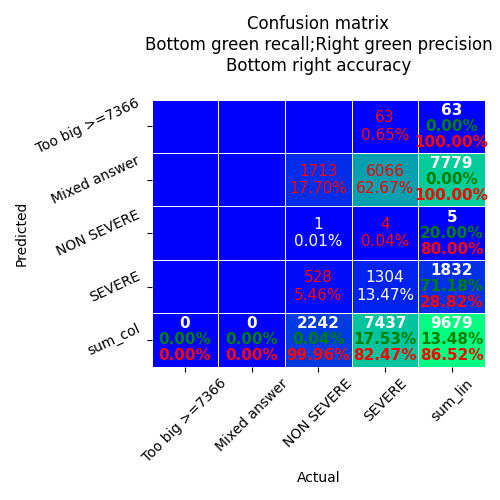

In [34]:
Image(filename='confusion_matrix.png') 

In [57]:
with open("representants.json") as f:
    representants = json.load(f)
    mapping = representants['mapping']
    print("The mapping used is: ")
    for k,v in mapping.items():
        print(k," -> ",v)
    representants = {eval(k):v for k,v in representants['samples'].items()}



The mapping used is: 
-2  ->  Too big >=7366
-1  ->  Mixed answer
0  ->  NON SEVERE
1  ->  SEVERE


In [60]:
true = 0
pred = 0
pd.set_option('display.html.use_mathjax', False)
pd.set_option('display.html.table_schema', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('colheader_justify', 'center')
df = pd.DataFrame(representants[pred,true])
def format_text_as_html(text):
    text = text.replace('\t', '&#9;')
    text = text.replace('\n', '<br>')
    return text
def map_to_name(digit):
    return mapping[str(digit)]
df['description'] = df['description'].apply(format_text_as_html)
df['true'] = df['true'].apply(map_to_name)
df['pred'] = df['pred'].apply(map_to_name)
html = df.to_html(escape=False, index=False, classes='my-table')
css = ".dataframe > tbody td { \ntext-align: left; \n}\n"
html = f'<style>{css}</style>\n{html}'
display(HTML(html))

bug_id,true,pred,description
4523,NON SEVERE,NON SEVERE,"Populate a Java or Web project with a bunch of files in different folders.Choose release on the project.In the release dialog, expand the resource hierarchy a few levels.It redraws completely each time.NOTES:GDA (5/30/2000 1:42:56 AM) JDK or VAJ?NE (5/30/00 10:01:09 AM) Sorry, VAJGDA (5/30/2000 1:38:58 PM) moving to jfaceEG (5/31/00 10:54:53 AM) the ReleaseAction is using a TableTree in the ServerSynchronizationDialgo. We observe the same flicker in our TableTreeViewer test cases com.ibm.jface.examples.viewertest.TestTableTree when you expand nodes. On the JDK the flickering is still disturbing when you are having a large tree.KH (5/31/00 9:33:51 AM) VI pls investigateVI (5/31/2000 11:51:25 AM) The code that is causing the flicker is this: TableTreeItem::public void setExpanded (boolean expand) { getParent().setRedraw(false); if (expand) expandItem(); else collapseItem(); getParent().setRedraw(true); } Unfortunately, if I remove the setRedraw calls, while the top part of the tree no longer flashes, on collapse the bottom part of the tree is redrawn for every item that is being hidden. The Tree widget also redraws the bottom part of the tree for each item on collapse but does so much faster. What is worse, one flash or multiple redraws as the tree collapses? There may also be some issues concerning editable table cells and multiple redraws. McQ (2/2/01 1:17:42 PM) - We are stuck with the above behavior, as long as we keep the existing API. It might be possible to have an ""add a collection"" of items."
